## Importing the libraries and modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Importing Data

In [2]:
#Assigning the data
Rental = pd.read_csv("day.csv")

#Explore the top 5 rows
Rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Preprocessing the Data

In [3]:
###variables instant  and dteday didn't help for creating the model, so removing from the data

Rental1 = Rental.drop(['instant','dteday'],axis=1)

Rental1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
Rental1.describe()

## on validating the describe function we can state that there are no missing values in the data set.(Good Sign)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
### glimpse on how the continous variable depending on eachother in both with and without cnt


cnames= ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']

cnames1= ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered']

numerdata= Rental1[cnames1]

numerical_data=Rental1[cnames]

In [6]:
numerical_data.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600


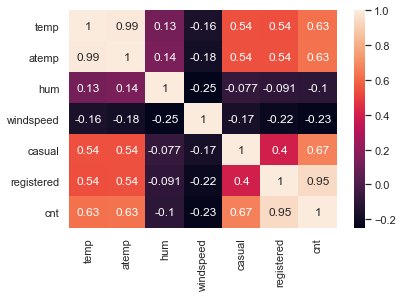

In [7]:
cor_numdata = numerical_data.corr()##with cnt

sns.heatmap(cor_numdata, annot = True)

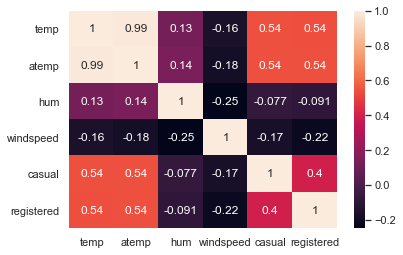

In [8]:
cor_numedata = numerdata.corr()##without cnt

sns.heatmap(cor_numedata, annot = True)

In [9]:
# by ploting the heatmap for the numerical data temp and atemp is high correlated and cnt & hum didn't have relation
##Hum is not required to predict the cnt variable it only makes negative effect to the model
## Removing those variable from the dataset 

Data_Rental= Rental1.drop(["atemp","hum"], axis= 1)

In [10]:
## Exploring the new dataset
Data_Rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.186900,82,1518,1600


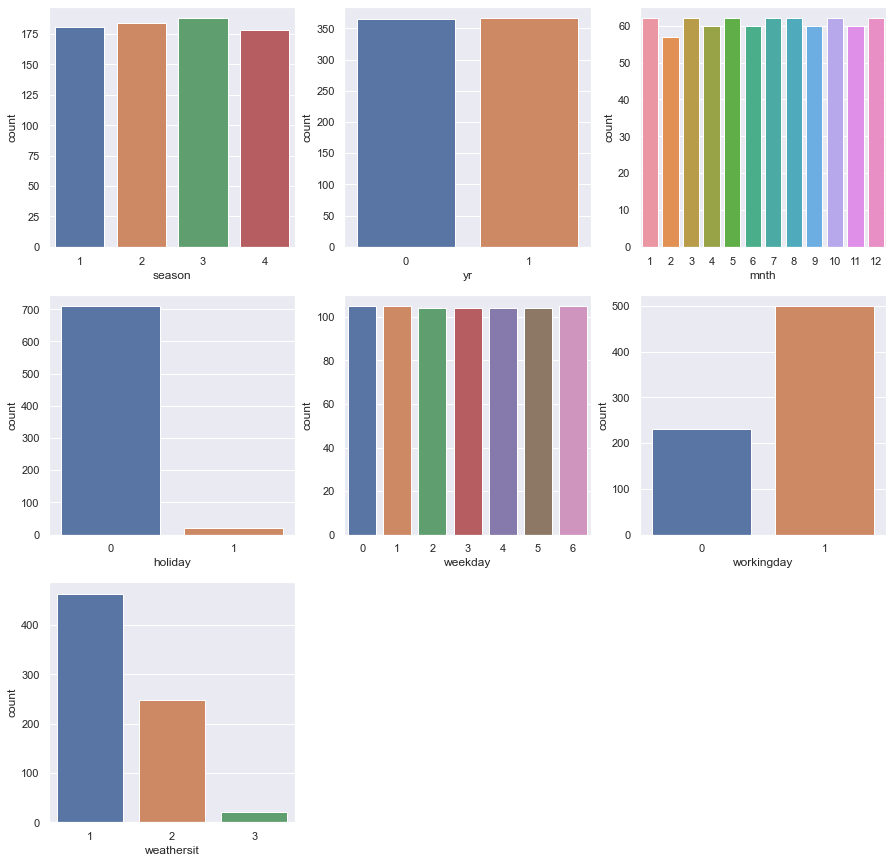

In [11]:
## Now its easy to handle the data 
## Visualization of categorical data

category =['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']
plt.figure(figsize=(15,15))
plt.subplot(331)
sns.countplot(Data_Rental.season)
plt.subplot(332)
sns.countplot(Data_Rental.yr)
plt.subplot(333)
sns.countplot(Data_Rental.mnth)
plt.subplot(334)
sns.countplot(Data_Rental.holiday)
plt.subplot(335)
sns.countplot(Data_Rental.weekday)
plt.subplot(336)
sns.countplot(Data_Rental.workingday)
plt.subplot(337)
sns.countplot(Data_Rental.weathersit)
plt.show()

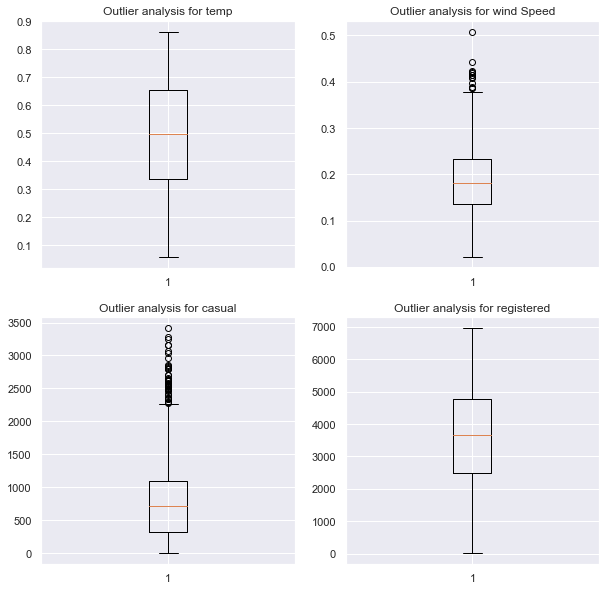

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.boxplot(Data_Rental.temp)
plt.title("Outlier analysis for temp")
plt.subplot(222)
plt.boxplot(Data_Rental.windspeed )
plt.title("Outlier analysis for wind Speed")
plt.subplot(223)
plt.boxplot(Data_Rental.casual )
plt.title("Outlier analysis for casual")
plt.subplot(224)
plt.boxplot(Data_Rental.registered )
plt.title("Outlier analysis for registered")
plt.show()

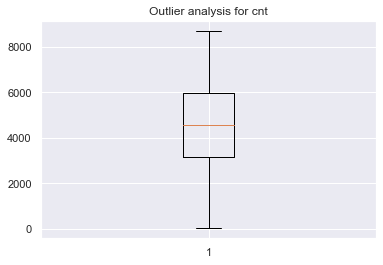

In [13]:
plt.boxplot(Data_Rental.cnt )
plt.title("Outlier analysis for cnt")
plt.show()

## Removing the outliers

In [14]:
## from observed boxplots casual and windspeed having the outliers

Outliers= ['windspeed','casual']

for i in Outliers:
    
    q75 ,q25 = np.percentile(Data_Rental.loc[:,i] ,[75,25])
    
    iqr =q75-q25
    
    minimum = q25 -(1.5*iqr)
    maximum = q75+(1.5*iqr)
    
    Data_Rental.loc[Data_Rental[i]<minimum ,i]=np.nan
    Data_Rental.loc[Data_Rental[i]>maximum ,i]=np.nan

In [15]:
m_values=pd.DataFrame(Data_Rental.isnull().sum())

In [16]:
m_values

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
windspeed,13
casual,44


In [17]:
m_values=m_values.sort_values(by=0 , ascending=False)
m_values.rename(columns={0:'count'},inplace=True)
m_values['count'] = (m_values['count']/Data_Rental.shape[0])*100
m_values.rename(columns={'count':"percentage"},inplace=True)

In [18]:
m_values

,percentage
casual,6.019152
windspeed,1.778386
season,0.000000
yr,0.000000
mnth,0.000000
holiday,0.000000
weekday,0.000000
workingday,0.000000
weathersit,0.000000
temp,0.000000


## Imputing values with KNN

In [19]:
from fancyimpute import KNN

In [21]:
Data_Rental = pd.DataFrame(KNN(k = 3).fit_transform(Data_Rental), columns = Data_Rental.columns,index=Data_Rental.index)

Imputing row 1/731 with 0 missing, elapsed time: 0.288
Imputing row 101/731 with 0 missing, elapsed time: 0.288
Imputing row 201/731 with 0 missing, elapsed time: 0.288
Imputing row 301/731 with 0 missing, elapsed time: 0.288
Imputing row 401/731 with 0 missing, elapsed time: 0.288
Imputing row 501/731 with 0 missing, elapsed time: 0.304
Imputing row 601/731 with 0 missing, elapsed time: 0.304
Imputing row 701/731 with 0 missing, elapsed time: 0.304


In [22]:
## verifying the missing values
missing=pd.DataFrame(Data_Rental.isnull().sum())
missing

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
windspeed,0
casual,0


## Feature scaling

In [26]:
df= Data_Rental.copy()

In [30]:
cnames2= ['temp', 'windspeed', 'casual','registered']

#Nomalisation
for i in cnames2:
    print(i)
    Data_Rental[i] = (Data_Rental[i] - min(Data_Rental[i]))/(max(Data_Rental[i]) - min(Data_Rental[i]))

temp
windspeed
casual
registered


In [31]:
##Checking the min values
min(Data_Rental.temp), min(Data_Rental.windspeed), min(Data_Rental.casual), min(Data_Rental.registered)

(0.0, 0.0, 0.0, 0.0)

In [32]:
##Checking the max values
max(Data_Rental.temp), max(Data_Rental.windspeed), max(Data_Rental.casual), max(Data_Rental.registered)

(1.0, 1.0, 1.0, 1.0)

In [38]:
 Data_Rental.shape

(731, 12)

## Model Development
     --  Desicion Tree   
     --  Random Forest
     --  Linear Regression

In [43]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [40]:
X = Data_Rental.values[:, 0:-1]
Y = Data_Rental.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2,  random_state = 2020)

## Training the Decision Tree Regression model on the Training set

In [44]:
regressor = DecisionTreeRegressor(random_state = 2020)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2020)

In [46]:
##Predicting the Test set results
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7446. 7436.]
 [8227. 7148.]
 [5538. 5362.]
 [7591. 6234.]
 [3331. 3071.]
 [2028. 2133.]
 [5102. 5008.]
 [6917. 6879.]
 [4094. 4098.]
 [2485. 2132.]
 [4097. 4075.]
 [3784. 3944.]
 [4010. 3958.]
 [3392. 3403.]
 [7446. 7415.]
 [6043. 6043.]
 [4569. 4509.]
 [6398. 6457.]
 [4826. 4795.]
 [3750. 3831.]
 [2914. 3228.]
 [5202. 5298.]
 [5740. 5918.]
 [1543. 1529.]
 [3409. 3649.]
 [4123. 4189.]
 [5499. 5170.]
 [1693. 1623.]
 [3784. 3805.]
 [7216. 7338.]
 [3485. 3423.]
 [4792. 4845.]
 [4881. 4906.]
 [6118. 6536.]
 [6544. 7129.]
 [3190. 2927.]
 [4182. 4195.]
 [4916. 5062.]
 [6544. 7132.]
 [3544. 3644.]
 [4563. 4634.]
 [3115. 2918.]
 [3292. 3163.]
 [7720. 7870.]
 [3574. 3542.]
 [4677. 4656.]
 [7030. 6779.]
 [2485. 2496.]
 [3922. 3956.]
 [4592. 4649.]
 [7261. 7112.]
 [4266. 4338.]
 [6544. 6883.]
 [3623. 3577.]
 [4763. 4725.]
 [6778. 7572.]
 [7216. 7040.]
 [4359. 4400.]
 [7691. 7693.]
 [3422. 3598.]
 [4563. 4486.]
 [7534. 7444.]
 [2115. 2134.]
 [3285. 3239.]
 [6436. 6211.]
 [7498. 7458.]
 [5225. 55

## Evaluating the Model Performance 

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9776588919849357

In [48]:
#Mean absolute percentage error
def MAPE(actual ,predicted):
    return np.mean(np.abs((actual-predicted)/actual))*100

In [49]:
MAPE(y_test,y_pred)

3.6720127209069364

## Training the Random Forest Regression model on the whole dataset 

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 2020)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=2020)

In [53]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7481.1 7436. ]
 [7772.6 7148. ]
 [5437.2 5362. ]
 [6528.6 6234. ]
 [2984.6 3071. ]
 [2116.9 2133. ]
 [5099.3 5008. ]
 [7003.4 6879. ]
 [4119.6 4098. ]
 [2306.  2132. ]
 [4073.1 4075. ]
 [3837.3 3944. ]
 [4065.1 3958. ]
 [3418.8 3403. ]
 [7424.8 7415. ]
 [6062.5 6043. ]
 [4495.8 4509. ]
 [6273.3 6457. ]
 [4858.3 4795. ]
 [3820.  3831. ]
 [3126.3 3228. ]
 [5258.4 5298. ]
 [5748.9 5918. ]
 [1534.8 1529. ]
 [3466.  3649. ]
 [4198.  4189. ]
 [5272.  5170. ]
 [1592.7 1623. ]
 [3848.5 3805. ]
 [7353.6 7338. ]
 [3527.  3423. ]
 [4855.4 4845. ]
 [4901.  4906. ]
 [6258.8 6536. ]
 [6602.2 7129. ]
 [3045.6 2927. ]
 [4239.  4195. ]
 [5037.6 5062. ]
 [6562.1 7132. ]
 [3642.5 3644. ]
 [4628.6 4634. ]
 [3062.1 2918. ]
 [3231.  3163. ]
 [7767.7 7870. ]
 [3549.8 3542. ]
 [4650.  4656. ]
 [6770.7 6779. ]
 [2384.5 2496. ]
 [3975.6 3956. ]
 [4646.5 4649. ]
 [7225.  7112. ]
 [4336.7 4338. ]
 [6522.2 6883. ]
 [3559.  3577. ]
 [4777.6 4725. ]
 [7375.4 7572. ]
 [7011.  7040. ]
 [4412.9 4400. ]
 [7736.4 7693.

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9940656409721551

In [55]:
MAPE(y_test,y_pred)

1.9022213788569153

## Training the Multiple Linear Regression model on the Training set 

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7472.32 7436.  ]
 [7257.   7148.  ]
 [5411.12 5362.  ]
 [6213.74 6234.  ]
 [3073.84 3071.  ]
 [2096.73 2133.  ]
 [5028.19 5008.  ]
 [6905.13 6879.  ]
 [4107.52 4098.  ]
 [2202.2  2132.  ]
 [4080.36 4075.  ]
 [3926.42 3944.  ]
 [3936.76 3958.  ]
 [3347.87 3403.  ]
 [7496.29 7415.  ]
 [5900.58 6043.  ]
 [4498.44 4509.  ]
 [6561.33 6457.  ]
 [4784.16 4795.  ]
 [3851.68 3831.  ]
 [3225.86 3228.  ]
 [5330.26 5298.  ]
 [5959.91 5918.  ]
 [1513.46 1529.  ]
 [3677.36 3649.  ]
 [4219.69 4189.  ]
 [5146.27 5170.  ]
 [1598.24 1623.  ]
 [3776.36 3805.  ]
 [7403.63 7338.  ]
 [3471.91 3423.  ]
 [4814.2  4845.  ]
 [5023.88 4906.  ]
 [6127.29 6536.  ]
 [6821.29 7129.  ]
 [2932.22 2927.  ]
 [4164.16 4195.  ]
 [5079.86 5062.  ]
 [6676.01 7132.  ]
 [3642.98 3644.  ]
 [4600.63 4634.  ]
 [2930.58 2918.  ]
 [3181.14 3163.  ]
 [7924.34 7870.  ]
 [3509.01 3542.  ]
 [4626.42 4656.  ]
 [6819.54 6779.  ]
 [2600.59 2496.  ]
 [3941.91 3956.  ]
 [4710.27 4649.  ]
 [7123.03 7112.  ]
 [4308.22 4338.  ]
 [6853.46 68

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9927905556124725

In [59]:
MAPE(y_test,y_pred)

1.2874952008859906

In [67]:
## OLS model for linear regression

import statsmodels.api as sm

LR= sm.OLS(y_train, X_train).fit()

In [68]:
y_pred = LR.predict(X_test)

In [69]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.548e+04
Date:                Mon, 24 Aug 2020   Prob (F-statistic):                        0.00
Time:                        17:58:09   Log-Likelihood:                         -3747.7
No. Observations:                 584   AIC:                                      7517.
Df Residuals:                     573   BIC:                                      7565.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.5527     10.938     -0.599      0.549     -28.037      14.931
x2            13.7641     19.811      0.695      0.487     -25.147      52.675
x3            -0.4534      3.186     -0.142      0.887      -6.711       5.804
x4            -4.0082     36.172     -0.111      0.912     -75.054      67.038
x5             7.1395      3.069      2.326      0.020       1.111      13.168
x6           -33.2985     22.953     -1.451      0.147     -78.380      11.783
x7            11.0703     11.107      0.997      0.319     -10.745      32.886
x8          -101.0862     42.035     -2.405      0.016    -183.649     -18.524
x9             4.6398     26.940      0.172      0.863     -48.273      57.553
x10         2514.8124     44.559     56.438      0.000    2427.294    2602.331
x11         6959.5511     65.549    106.173      0.000    6830.805    7088.297
==============================================================================
Omnibus:                      543.716   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14602.491
Skew:                           4.229   Prob(JB):                         0.00
Kurtosis:                      25.990   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""